In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.4.0
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Apr 13 2021 10:51:59CEST



## Load of the data

   You can also load all of them! Writing "all_data"

In [3]:
from process import loaddata
class_data0 = loaddata("../data/{}.csv".format('weight'))

In [4]:
class_data0 = class_data0[class_data0[:,0] > 0.0001]

In [6]:
class_data0.shape

(1159974, 14)

In [7]:
np.random.shuffle(class_data0)
y = class_data0[:,0]
A = class_data0
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x = class_data0[:,1:10]
print(x[0])
print(x.shape)

[ 4.07685958e-04  4.22706899e+01 -1.62203982e+01  1.24997361e+01
  2.85229244e+01 -3.98492063e+01 -6.67856325e+01  1.53800000e+07
  2.99000000e+07 -4.95794175e-01 -3.94483722e-01  3.76929931e-01
 -3.75999618e-01  2.28596166e-07]
[ 4.07685958e-04  4.22706899e+01 -1.62203982e+01  1.24997361e+01
  2.85229244e+01 -3.98492063e+01 -6.67856325e+01  1.53800000e+07
  2.99000000e+07  2.28596166e-07 -3.94483722e-01  3.76929931e-01
 -3.75999618e-01  2.28596166e-07]
[ 4.22706899e+01 -1.62203982e+01  1.24997361e+01  2.85229244e+01
 -3.98492063e+01 -6.67856325e+01  1.53800000e+07  2.99000000e+07
  2.28596166e-07]
(1159974, 9)


In [9]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 869980 
Valuation sample: 289994


In [10]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [23]:
def build_model() :
    model = models.Sequential()
    model.add (BatchNormalization(input_dim = 9))
    model.add (layers.Dense (12 , activation = "sigmoid"))
    model.add (layers.Dense (9 , activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = 'mae' , metrics = ["mape"])
    return model

In [26]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 5000000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}.h5".format('badmodel'))

Epoch 1/1000
1/1 [==============================] - 1s 706ms/step - loss: 0.5203 - mape: 195517.6719 - val_loss: 0.5402 - val_mape: 203423.0781
Epoch 2/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.5183 - mape: 194699.8750 - val_loss: 0.5357 - val_mape: 201672.1094
Epoch 3/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.5165 - mape: 193919.4062 - val_loss: 0.5320 - val_mape: 200209.0156
Epoch 4/1000
1/1 [==============================] - 0s 184ms/step - loss: 0.5146 - mape: 193176.0781 - val_loss: 0.5287 - val_mape: 198926.1875
Epoch 5/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.5129 - mape: 192469.2656 - val_loss: 0.5258 - val_mape: 197768.7969
Epoch 6/1000
1/1 [==============================] - 0s 185ms/step - loss: 0.5113 - mape: 191797.7344 - val_loss: 0.5232 - val_mape: 196708.3750
Epoch 7/1000
1/1 [==============================] - 0s 188ms/step - loss: 0.5098 - mape: 191160.0000 - val_loss: 0.5207 - val_mape: 1957

1/1 [==============================] - 0s 189ms/step - loss: 0.4666 - mape: 174330.3438 - val_loss: 0.4641 - val_mape: 173478.1875
Epoch 58/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.4658 - mape: 174021.5938 - val_loss: 0.4633 - val_mape: 173144.3906
Epoch 59/1000
1/1 [==============================] - 0s 189ms/step - loss: 0.4649 - mape: 173710.0000 - val_loss: 0.4624 - val_mape: 172808.5781
Epoch 60/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.4641 - mape: 173395.4688 - val_loss: 0.4614 - val_mape: 172470.5625
Epoch 61/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.4632 - mape: 173077.9219 - val_loss: 0.4605 - val_mape: 172130.2656
Epoch 62/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.4623 - mape: 172757.4062 - val_loss: 0.4596 - val_mape: 171787.4844
Epoch 63/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.4615 - mape: 172433.6562 - val_loss: 0.4587 - val_mape: 171442.1406

1/1 [==============================] - 0s 205ms/step - loss: 0.3992 - mape: 149389.1562 - val_loss: 0.3942 - val_mape: 147546.0781
Epoch 114/1000
1/1 [==============================] - 0s 203ms/step - loss: 0.3972 - mape: 148663.1562 - val_loss: 0.3922 - val_mape: 146807.3125
Epoch 115/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.3952 - mape: 147917.2031 - val_loss: 0.3902 - val_mape: 146049.6250
Epoch 116/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.3931 - mape: 147151.0156 - val_loss: 0.3880 - val_mape: 145272.3594
Epoch 117/1000
1/1 [==============================] - 0s 199ms/step - loss: 0.3910 - mape: 146363.9688 - val_loss: 0.3859 - val_mape: 144475.0312
Epoch 118/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.3888 - mape: 145555.7188 - val_loss: 0.3837 - val_mape: 143657.1562
Epoch 119/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.3865 - mape: 144725.7344 - val_loss: 0.3814 - val_mape: 14281

1/1 [==============================] - 0s 187ms/step - loss: 0.2267 - mape: 85574.7109 - val_loss: 0.2217 - val_mape: 83751.5859
Epoch 170/1000
1/1 [==============================] - 0s 186ms/step - loss: 0.2232 - mape: 84285.0469 - val_loss: 0.2183 - val_mape: 82482.8203
Epoch 171/1000
1/1 [==============================] - 0s 185ms/step - loss: 0.2198 - mape: 83000.3125 - val_loss: 0.2149 - val_mape: 81220.2109
Epoch 172/1000
1/1 [==============================] - 0s 188ms/step - loss: 0.2164 - mape: 81721.9922 - val_loss: 0.2116 - val_mape: 79964.2500
Epoch 173/1000
1/1 [==============================] - 0s 187ms/step - loss: 0.2129 - mape: 80449.8281 - val_loss: 0.2082 - val_mape: 78715.4531
Epoch 174/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.2095 - mape: 79184.4297 - val_loss: 0.2049 - val_mape: 77474.2969
Epoch 175/1000
1/1 [==============================] - 0s 189ms/step - loss: 0.2062 - mape: 77927.3750 - val_loss: 0.2016 - val_mape: 76241.2188
Epoch 1

Epoch 226/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.0798 - mape: 30564.5176 - val_loss: 0.0784 - val_mape: 30085.3574
Epoch 227/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0782 - mape: 29994.8281 - val_loss: 0.0770 - val_mape: 29530.6348
Epoch 228/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0768 - mape: 29437.3320 - val_loss: 0.0755 - val_mape: 28987.4629
Epoch 229/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0753 - mape: 28891.6582 - val_loss: 0.0741 - val_mape: 28455.6602
Epoch 230/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0739 - mape: 28357.6387 - val_loss: 0.0728 - val_mape: 27935.0176
Epoch 231/1000
1/1 [==============================] - 0s 200ms/step - loss: 0.0725 - mape: 27834.7070 - val_loss: 0.0714 - val_mape: 27425.3438
Epoch 232/1000
1/1 [==============================] - 0s 242ms/step - loss: 0.0712 - mape: 27323.1250 - val_loss: 0.0701 - val_mape: 269

Epoch 283/1000
1/1 [==============================] - 0s 203ms/step - loss: 0.0303 - mape: 11743.1992 - val_loss: 0.0300 - val_mape: 11655.8223
Epoch 284/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0298 - mape: 11575.4160 - val_loss: 0.0296 - val_mape: 11490.2939
Epoch 285/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0294 - mape: 11411.1250 - val_loss: 0.0292 - val_mape: 11328.0117
Epoch 286/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0290 - mape: 11249.9062 - val_loss: 0.0287 - val_mape: 11168.9033
Epoch 287/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0286 - mape: 11092.0361 - val_loss: 0.0283 - val_mape: 11012.8906
Epoch 288/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0282 - mape: 10937.0996 - val_loss: 0.0279 - val_mape: 10859.9033
Epoch 289/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0278 - mape: 10785.5410 - val_loss: 0.0276 - val_mape: 107

1/1 [==============================] - 0s 203ms/step - loss: 0.0148 - mape: 5801.6938 - val_loss: 0.0147 - val_mape: 5770.0527
Epoch 341/1000
1/1 [==============================] - 0s 207ms/step - loss: 0.0147 - mape: 5740.6138 - val_loss: 0.0146 - val_mape: 5709.3794
Epoch 342/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0145 - mape: 5680.4941 - val_loss: 0.0144 - val_mape: 5649.6362
Epoch 343/1000
1/1 [==============================] - 0s 199ms/step - loss: 0.0144 - mape: 5621.3208 - val_loss: 0.0143 - val_mape: 5590.8022
Epoch 344/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0142 - mape: 5563.0537 - val_loss: 0.0141 - val_mape: 5532.8623
Epoch 345/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.0141 - mape: 5505.6401 - val_loss: 0.0140 - val_mape: 5475.7979
Epoch 346/1000
1/1 [==============================] - 0s 222ms/step - loss: 0.0139 - mape: 5449.0796 - val_loss: 0.0138 - val_mape: 5419.5918
Epoch 347/1000
1/1 [=

Epoch 398/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.0086 - mape: 3382.7053 - val_loss: 0.0085 - val_mape: 3363.6877
Epoch 399/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0085 - mape: 3355.1492 - val_loss: 0.0085 - val_mape: 3336.2739
Epoch 400/1000
1/1 [==============================] - 0s 202ms/step - loss: 0.0084 - mape: 3327.9387 - val_loss: 0.0084 - val_mape: 3309.1912
Epoch 401/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.0084 - mape: 3301.0774 - val_loss: 0.0083 - val_mape: 3282.4324
Epoch 402/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0083 - mape: 3274.5110 - val_loss: 0.0083 - val_mape: 3255.9937
Epoch 403/1000
1/1 [==============================] - 0s 201ms/step - loss: 0.0082 - mape: 3248.2808 - val_loss: 0.0082 - val_mape: 3229.8696
Epoch 404/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0082 - mape: 3222.3240 - val_loss: 0.0081 - val_mape: 3204.0559
Epoch 

Epoch 456/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0055 - mape: 2205.6128 - val_loss: 0.0055 - val_mape: 2192.3452
Epoch 457/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.0055 - mape: 2190.9885 - val_loss: 0.0055 - val_mape: 2177.7971
Epoch 458/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0055 - mape: 2176.5159 - val_loss: 0.0054 - val_mape: 2163.3906
Epoch 459/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0054 - mape: 2162.1565 - val_loss: 0.0054 - val_mape: 2149.1252
Epoch 460/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.0054 - mape: 2147.9673 - val_loss: 0.0054 - val_mape: 2134.9980
Epoch 461/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0054 - mape: 2133.9248 - val_loss: 0.0053 - val_mape: 2121.0083
Epoch 462/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0053 - mape: 2119.9744 - val_loss: 0.0053 - val_mape: 2107.1536
Epoch 

Epoch 514/1000
1/1 [==============================] - 0s 202ms/step - loss: 0.0039 - mape: 1546.6658 - val_loss: 0.0038 - val_mape: 1537.0468
Epoch 515/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0038 - mape: 1537.9702 - val_loss: 0.0038 - val_mape: 1528.4136
Epoch 516/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.0038 - mape: 1529.3574 - val_loss: 0.0038 - val_mape: 1519.8513
Epoch 517/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.0038 - mape: 1520.8073 - val_loss: 0.0038 - val_mape: 1511.3590
Epoch 518/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.0038 - mape: 1512.3451 - val_loss: 0.0037 - val_mape: 1502.9362
Epoch 519/1000
1/1 [==============================] - 0s 199ms/step - loss: 0.0037 - mape: 1503.9147 - val_loss: 0.0037 - val_mape: 1494.5818
Epoch 520/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.0037 - mape: 1495.5875 - val_loss: 0.0037 - val_mape: 1486.2948
Epoch 

Epoch 572/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.0028 - mape: 1140.2269 - val_loss: 0.0028 - val_mape: 1133.1141
Epoch 573/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0028 - mape: 1134.6338 - val_loss: 0.0028 - val_mape: 1127.5664
Epoch 574/1000
1/1 [==============================] - 0s 185ms/step - loss: 0.0028 - mape: 1129.1036 - val_loss: 0.0028 - val_mape: 1122.0575
Epoch 575/1000
1/1 [==============================] - 0s 188ms/step - loss: 0.0028 - mape: 1123.5884 - val_loss: 0.0028 - val_mape: 1116.5874
Epoch 576/1000
1/1 [==============================] - 0s 186ms/step - loss: 0.0028 - mape: 1118.1277 - val_loss: 0.0027 - val_mape: 1111.1550
Epoch 577/1000
1/1 [==============================] - 0s 192ms/step - loss: 0.0027 - mape: 1112.7021 - val_loss: 0.0027 - val_mape: 1105.7607
Epoch 578/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.0027 - mape: 1107.2980 - val_loss: 0.0027 - val_mape: 1100.4044
Epoch 

1/1 [==============================] - 0s 201ms/step - loss: 0.0021 - mape: 871.4283 - val_loss: 0.0021 - val_mape: 866.0698
Epoch 631/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0021 - mape: 867.6187 - val_loss: 0.0021 - val_mape: 862.2885
Epoch 632/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.0021 - mape: 863.8384 - val_loss: 0.0021 - val_mape: 858.5306
Epoch 633/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0021 - mape: 860.0790 - val_loss: 0.0021 - val_mape: 854.7961
Epoch 634/1000
1/1 [==============================] - 0s 200ms/step - loss: 0.0021 - mape: 856.3413 - val_loss: 0.0021 - val_mape: 851.0845
Epoch 635/1000
1/1 [==============================] - 0s 188ms/step - loss: 0.0021 - mape: 852.6341 - val_loss: 0.0021 - val_mape: 847.3952
Epoch 636/1000
1/1 [==============================] - 0s 203ms/step - loss: 0.0021 - mape: 848.9379 - val_loss: 0.0021 - val_mape: 843.7290
Epoch 637/1000
1/1 [===============

1/1 [==============================] - 0s 192ms/step - loss: 0.0017 - mape: 684.2445 - val_loss: 0.0016 - val_mape: 680.1210
Epoch 689/1000
1/1 [==============================] - 0s 186ms/step - loss: 0.0016 - mape: 681.5342 - val_loss: 0.0016 - val_mape: 677.4271
Epoch 690/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.0016 - mape: 678.8330 - val_loss: 0.0016 - val_mape: 674.7477
Epoch 691/1000
1/1 [==============================] - 0s 199ms/step - loss: 0.0016 - mape: 676.1566 - val_loss: 0.0016 - val_mape: 672.0833
Epoch 692/1000
1/1 [==============================] - 0s 205ms/step - loss: 0.0016 - mape: 673.4858 - val_loss: 0.0016 - val_mape: 669.4330
Epoch 693/1000
1/1 [==============================] - 0s 202ms/step - loss: 0.0016 - mape: 670.8344 - val_loss: 0.0016 - val_mape: 666.7977
Epoch 694/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0016 - mape: 668.1944 - val_loss: 0.0016 - val_mape: 664.1768
Epoch 695/1000
1/1 [===============

1/1 [==============================] - 0s 190ms/step - loss: 0.0013 - mape: 548.6475 - val_loss: 0.0013 - val_mape: 545.4131
Epoch 747/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0013 - mape: 546.6507 - val_loss: 0.0013 - val_mape: 543.4273
Epoch 748/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.0013 - mape: 544.6620 - val_loss: 0.0013 - val_mape: 541.4514
Epoch 749/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.0013 - mape: 542.6818 - val_loss: 0.0013 - val_mape: 539.4854
Epoch 750/1000
1/1 [==============================] - 0s 184ms/step - loss: 0.0013 - mape: 540.7172 - val_loss: 0.0013 - val_mape: 537.5292
Epoch 751/1000
1/1 [==============================] - 0s 189ms/step - loss: 0.0013 - mape: 538.7551 - val_loss: 0.0013 - val_mape: 535.5826
Epoch 752/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0013 - mape: 536.8055 - val_loss: 0.0013 - val_mape: 533.6457
Epoch 753/1000
1/1 [===============

1/1 [==============================] - 0s 217ms/step - loss: 0.0011 - mape: 447.4391 - val_loss: 0.0011 - val_mape: 444.8544
Epoch 805/1000
1/1 [==============================] - 0s 207ms/step - loss: 0.0011 - mape: 445.9299 - val_loss: 0.0011 - val_mape: 443.3522
Epoch 806/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.0011 - mape: 444.4245 - val_loss: 0.0010 - val_mape: 441.8570
Epoch 807/1000
1/1 [==============================] - 0s 206ms/step - loss: 0.0010 - mape: 442.9242 - val_loss: 0.0010 - val_mape: 440.3689
Epoch 808/1000
1/1 [==============================] - 0s 216ms/step - loss: 0.0010 - mape: 441.4362 - val_loss: 0.0010 - val_mape: 438.8875
Epoch 809/1000
1/1 [==============================] - 0s 207ms/step - loss: 0.0010 - mape: 439.9466 - val_loss: 0.0010 - val_mape: 437.4128
Epoch 810/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.0010 - mape: 438.4714 - val_loss: 0.0010 - val_mape: 435.9450
Epoch 811/1000
1/1 [===============

1/1 [==============================] - 0s 199ms/step - loss: 8.7582e-04 - mape: 372.4856 - val_loss: 8.7159e-04 - val_mape: 370.3683
Epoch 861/1000
1/1 [==============================] - 0s 198ms/step - loss: 8.7295e-04 - mape: 371.3115 - val_loss: 8.6872e-04 - val_mape: 369.1985
Epoch 862/1000
1/1 [==============================] - 0s 196ms/step - loss: 8.7007e-04 - mape: 370.1349 - val_loss: 8.6587e-04 - val_mape: 368.0337
Epoch 863/1000
1/1 [==============================] - 0s 192ms/step - loss: 8.6721e-04 - mape: 368.9669 - val_loss: 8.6303e-04 - val_mape: 366.8741
Epoch 864/1000
1/1 [==============================] - 0s 192ms/step - loss: 8.6438e-04 - mape: 367.8067 - val_loss: 8.6021e-04 - val_mape: 365.7196
Epoch 865/1000
1/1 [==============================] - 0s 200ms/step - loss: 8.6156e-04 - mape: 366.6530 - val_loss: 8.5739e-04 - val_mape: 364.5698
Epoch 866/1000
1/1 [==============================] - 0s 192ms/step - loss: 8.5875e-04 - mape: 365.5012 - val_loss: 8.5459e-04 

1/1 [==============================] - 0s 186ms/step - loss: 7.3545e-04 - mape: 314.6413 - val_loss: 7.3186e-04 - val_mape: 312.8725
Epoch 916/1000
1/1 [==============================] - 0s 197ms/step - loss: 7.3320e-04 - mape: 313.7029 - val_loss: 7.2963e-04 - val_mape: 311.9444
Epoch 917/1000
1/1 [==============================] - 0s 204ms/step - loss: 7.3097e-04 - mape: 312.7784 - val_loss: 7.2740e-04 - val_mape: 311.0201
Epoch 918/1000
1/1 [==============================] - 0s 195ms/step - loss: 7.2874e-04 - mape: 311.8486 - val_loss: 7.2519e-04 - val_mape: 310.0996
Epoch 919/1000
1/1 [==============================] - 0s 193ms/step - loss: 7.2653e-04 - mape: 310.9279 - val_loss: 7.2299e-04 - val_mape: 309.1829
Epoch 920/1000
1/1 [==============================] - 0s 193ms/step - loss: 7.2433e-04 - mape: 310.0097 - val_loss: 7.2079e-04 - val_mape: 308.2699
Epoch 921/1000
1/1 [==============================] - 0s 200ms/step - loss: 7.2213e-04 - mape: 309.0919 - val_loss: 7.1861e-04 

1/1 [==============================] - 0s 196ms/step - loss: 6.2565e-04 - mape: 268.5081 - val_loss: 6.2254e-04 - val_mape: 267.0138
Epoch 971/1000
1/1 [==============================] - 0s 196ms/step - loss: 6.2389e-04 - mape: 267.7601 - val_loss: 6.2079e-04 - val_mape: 266.2696
Epoch 972/1000
1/1 [==============================] - 0s 193ms/step - loss: 6.2213e-04 - mape: 267.0118 - val_loss: 6.1904e-04 - val_mape: 265.5281
Epoch 973/1000
1/1 [==============================] - 0s 193ms/step - loss: 6.2039e-04 - mape: 266.2707 - val_loss: 6.1730e-04 - val_mape: 264.7895
Epoch 974/1000
1/1 [==============================] - 0s 194ms/step - loss: 6.1865e-04 - mape: 265.5312 - val_loss: 6.1557e-04 - val_mape: 264.0538
Epoch 975/1000
1/1 [==============================] - 0s 194ms/step - loss: 6.1692e-04 - mape: 264.7951 - val_loss: 6.1385e-04 - val_mape: 263.3211
Epoch 976/1000
1/1 [==============================] - 0s 188ms/step - loss: 6.1519e-04 - mape: 264.0581 - val_loss: 6.1213e-04 

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 9)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 283
Trainable params: 265
Non-trainable params: 18
_________________________________________________________________


<ipython-input-28-44b2707ff4a7>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


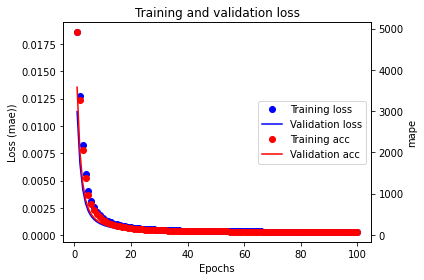

In [28]:
import matplotlib.pyplot as plt

loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']

accuracy = history_cl.history['mape']
val_accuracy = history_cl.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mae))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
#fig.savefig("acc+loss_drop.pdf")
fig.show()

## Probability density distribution

In [29]:
y0 = class_data0[:,0]
A0 = class_data0
A0[:,9] = A0[:,13]
x0 = class_data0[:,1:10]

In [30]:
y0

array([0.00040769, 0.00033709, 0.00177284, ..., 0.00074805, 0.00011408,
       0.00029182])

In [45]:
y_pred = model_class.predict(x0)

In [46]:
n = 'badmodel'
os.system('mkdir ../plots/{}'.format(n))

256

In [ ]:
from matplotlib import pyplot
y = np.array(y)
bins = np.linspace(0.0001, 0.03, 100)
pyplot.hist(y0, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
plt.savefig('../plots/badmodel/probabilitycomparison_{}.png'.format(n))
plt.savefig('../plots/badmodel/probabilitycomparison_{}.pdf'.format(n))
pyplot.show()